# Multivariate analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

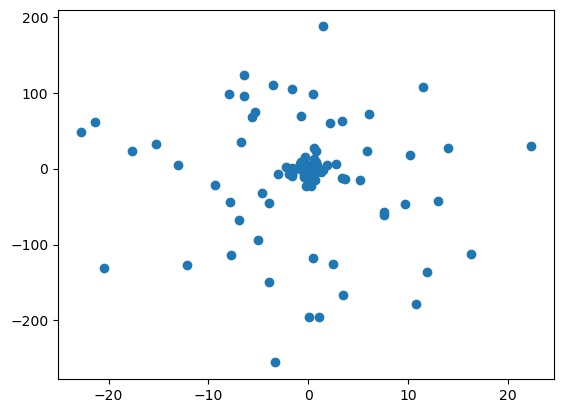

In [2]:
mu = np.array([0.0, 0.0])
cov = np.array([
    [1.0, 10.0], 
    [10.0, 100.0]
])
sample = 100

X = np.random.normal(mu, cov, size=(int(sample/2), 2, 2)).reshape(sample, 2)

plt.scatter(X[:, 0], X[:, 1])

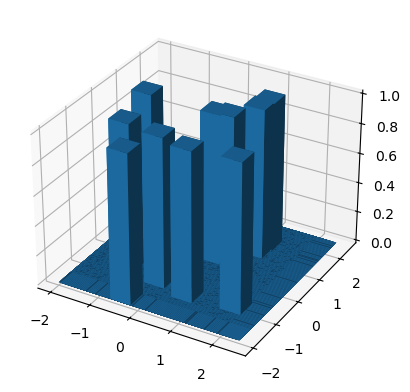

In [3]:
ax = plt.figure().add_subplot(projection='3d')

hist, xedges, yedges = np.histogram2d(X[:, 0], X[:, 1], bins=100, range=[[-2, 2], [-2, 2]])

xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

## Bivariate normals visualisation

Text(0.5, 1.0, '$\\mathrm{Cov}(X_1, X_2) < 0$')

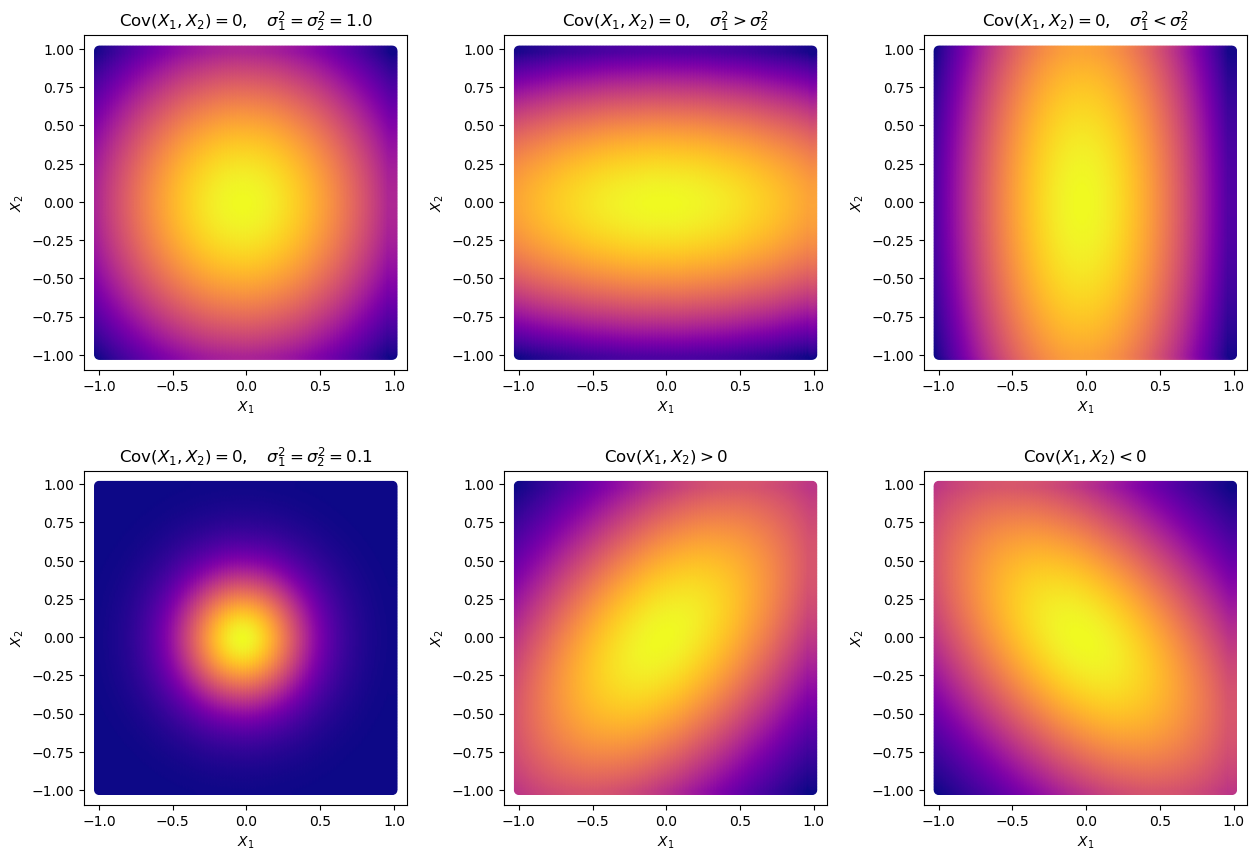

In [263]:
normal = lambda x, mu, cov: (1/((2*np.pi)**(cov.shape[0]/2) * np.linalg.det(cov)**0.5)) * np.exp(-0.5 * (x-mu).T @ np.linalg.pinv(cov) @ (x-mu))

XX, YY = np.mgrid[-1:1:0.01, -1:1:0.01]
X = np.vstack((XX.flatten(), YY.flatten())).T


fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(wspace=0.3, hspace=0.3, )
axes = axes.flatten()

# First normal
mu = np.array([[0.0], [0.0]])
cov = np.array([
    [1.0, 0.0],
    [0.0, 1.0]
])
Y = np.array([normal(x[..., None], mu, cov).flatten() for x in X])
axes[0].scatter(X[:, 0], X[:, 1], c=Y, cmap='plasma')
axes[0].set_xlabel("$X_1$")
axes[0].set_ylabel("$X_2$")
axes[0].set_title(r"$\mathrm{Cov}(X_1, X_2) = 0, \hspace{1} \sigma_1^2 = \sigma_2^2 = 1.0$")

# First normal
mu = np.array([[0.0], [0.0]])
cov = np.array([
    [5.0, 0.0],
    [0.0, 1.0]
])
Y = np.array([normal(x[..., None], mu, cov).flatten() for x in X])
axes[1].scatter(X[:, 0], X[:, 1], c=Y, cmap='plasma')
axes[1].set_xlabel("$X_1$")
axes[1].set_ylabel("$X_2$")
axes[1].set_title(r"$\mathrm{Cov}(X_1, X_2) = 0, \hspace{1} \sigma_1^2 > \sigma_2^2$")

# First normal
mu = np.array([[0.0], [0.0]])
cov = np.array([
    [1.0, 0.0],
    [0.0, 5.0]
])
Y = np.array([normal(x[..., None], mu, cov).flatten() for x in X])
axes[2].scatter(X[:, 0], X[:, 1], c=Y, cmap='plasma')
axes[2].set_xlabel("$X_1$")
axes[2].set_ylabel("$X_2$")
axes[2].set_title(r"$\mathrm{Cov}(X_1, X_2) = 0, \hspace{1} \sigma_1^2 < \sigma_2^2$")

# First normal
mu = np.array([[0.0], [0.0]])
cov = np.array([
    [0.1, 0.0],
    [0.0, 0.1]
])
Y = np.array([normal(x[..., None], mu, cov).flatten() for x in X])
axes[3].scatter(X[:, 0], X[:, 1], c=Y, cmap='plasma')
axes[3].set_xlabel("$X_1$")
axes[3].set_ylabel("$X_2$")
axes[3].set_title(r"$\mathrm{Cov}(X_1, X_2) = 0, \hspace{1} \sigma_1^2 = \sigma_2^2 = 0.1$")

# First normal
mu = np.array([[0.0], [0.0]])
cov = np.array([
    [1.0, 0.5],
    [0.5, 1.0]
])
Y = np.array([normal(x[..., None], mu, cov).flatten() for x in X])
axes[4].scatter(X[:, 0], X[:, 1], c=Y, cmap='plasma')
axes[4].set_xlabel("$X_1$")
axes[4].set_ylabel("$X_2$")
axes[4].set_title(r"$\mathrm{Cov}(X_1, X_2) > 0$")

# First normal
mu = np.array([[0.0], [0.0]])
cov = np.array([
    [1.0, -0.5],
    [-0.5, 1.0]
])
Y = np.array([normal(x[..., None], mu, cov).flatten() for x in X])
axes[5].scatter(X[:, 0], X[:, 1], c=Y, cmap='plasma')
axes[5].set_xlabel("$X_1$")
axes[5].set_ylabel("$X_2$")
axes[5].set_title(r"$\mathrm{Cov}(X_1, X_2) < 0$")

Text(0.5, 0.92, '$\\mathrm{Cov}(X_1, X_2) < 0$')

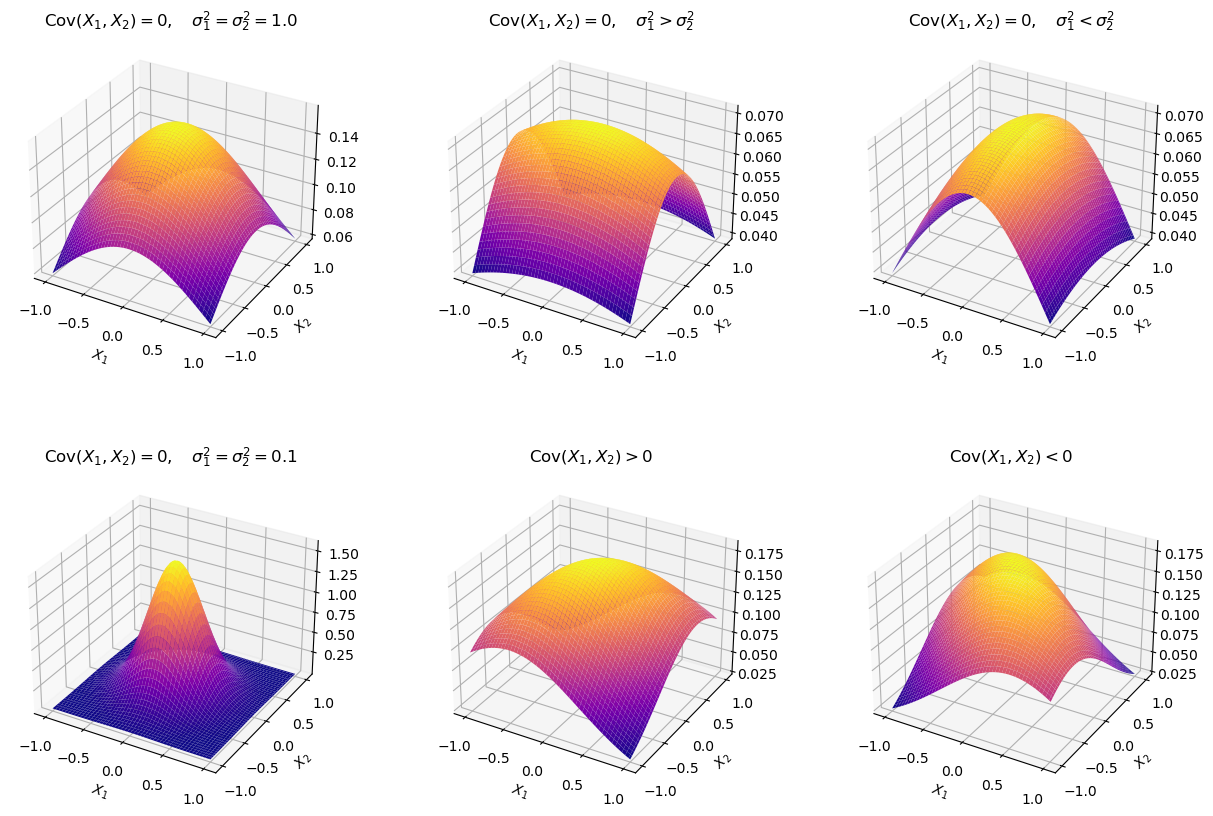

In [265]:
normal = lambda x, mu, cov: (1/((2*np.pi)**(cov.shape[0]/2) * np.linalg.det(cov)**0.5)) * np.exp(-0.5 * (x-mu).T @ np.linalg.pinv(cov) @ (x-mu))

dims = 100

XX, YY = np.meshgrid(np.linspace(-1, 1, dims), np.linspace(-1, 1, dims))
X = np.vstack((XX.flatten(), YY.flatten())).T

fig, axes = plt.subplots(2, 3, figsize=(15, 10), subplot_kw=dict(projection="3d"))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

axes = axes.flatten()

# First normal
mu = np.array([[0.0], [0.0]])
cov = np.array([
    [1.0, 0.0],
    [0.0, 1.0]
])
Y = np.array([normal(x[..., None], mu, cov).flatten() for x in X])
axes[0].plot_surface(XX, YY, Y.reshape(dims, dims), cmap='plasma')
axes[0].set_xlabel("$X_1$")
axes[0].set_ylabel("$X_2$")
axes[0].set_title(r"$\mathrm{Cov}(X_1, X_2) = 0, \hspace{1} \sigma_1^2 = \sigma_2^2 = 1.0$")

# First normal
mu = np.array([[0.0], [0.0]])
cov = np.array([
    [5.0, 0.0],
    [0.0, 1.0]
])
Y = np.array([normal(x[..., None], mu, cov).flatten() for x in X])
axes[1].plot_surface(XX, YY, Y.reshape(dims, dims), cmap='plasma')
axes[1].set_xlabel("$X_1$")
axes[1].set_ylabel("$X_2$")
axes[1].set_title(r"$\mathrm{Cov}(X_1, X_2) = 0, \hspace{1} \sigma_1^2 > \sigma_2^2$")

# First normal
mu = np.array([[0.0], [0.0]])
cov = np.array([
    [1.0, 0.0],
    [0.0, 5.0]
])
Y = np.array([normal(x[..., None], mu, cov).flatten() for x in X])
axes[2].plot_surface(XX, YY, Y.reshape(dims, dims), cmap='plasma')
axes[2].set_xlabel("$X_1$")
axes[2].set_ylabel("$X_2$")
axes[2].set_title(r"$\mathrm{Cov}(X_1, X_2) = 0, \hspace{1} \sigma_1^2 < \sigma_2^2$")

# First normal
mu = np.array([[0.0], [0.0]])
cov = np.array([
    [0.1, 0.0],
    [0.0, 0.1]
])
Y = np.array([normal(x[..., None], mu, cov).flatten() for x in X])
axes[3].plot_surface(XX, YY, Y.reshape(dims, dims), cmap='plasma')
axes[3].set_xlabel("$X_1$")
axes[3].set_ylabel("$X_2$")
axes[3].set_title(r"$\mathrm{Cov}(X_1, X_2) = 0, \hspace{1} \sigma_1^2 = \sigma_2^2 = 0.1$")

# First normal
mu = np.array([[0.0], [0.0]])
cov = np.array([
    [1.0, 0.5],
    [0.5, 1.0]
])
Y = np.array([normal(x[..., None], mu, cov).flatten() for x in X])
axes[4].plot_surface(XX, YY, Y.reshape(dims, dims), cmap='plasma')
axes[4].set_xlabel("$X_1$")
axes[4].set_ylabel("$X_2$")
axes[4].set_title(r"$\mathrm{Cov}(X_1, X_2) > 0$")

# First normal
mu = np.array([[0.0], [0.0]])
cov = np.array([
    [1.0, -0.5],
    [-0.5, 1.0]
])
Y = np.array([normal(x[..., None], mu, cov).flatten() for x in X])
axes[5].plot_surface(XX, YY, Y.reshape(dims, dims), cmap='plasma')
axes[5].set_xlabel("$X_1$")
axes[5].set_ylabel("$X_2$")
axes[5].set_title(r"$\mathrm{Cov}(X_1, X_2) < 0$")


## Box-Muller transform
Transform two independent uniform random variables into two independent random variables with a standard normal distribution 

<AxesSubplot: ylabel='Count'>

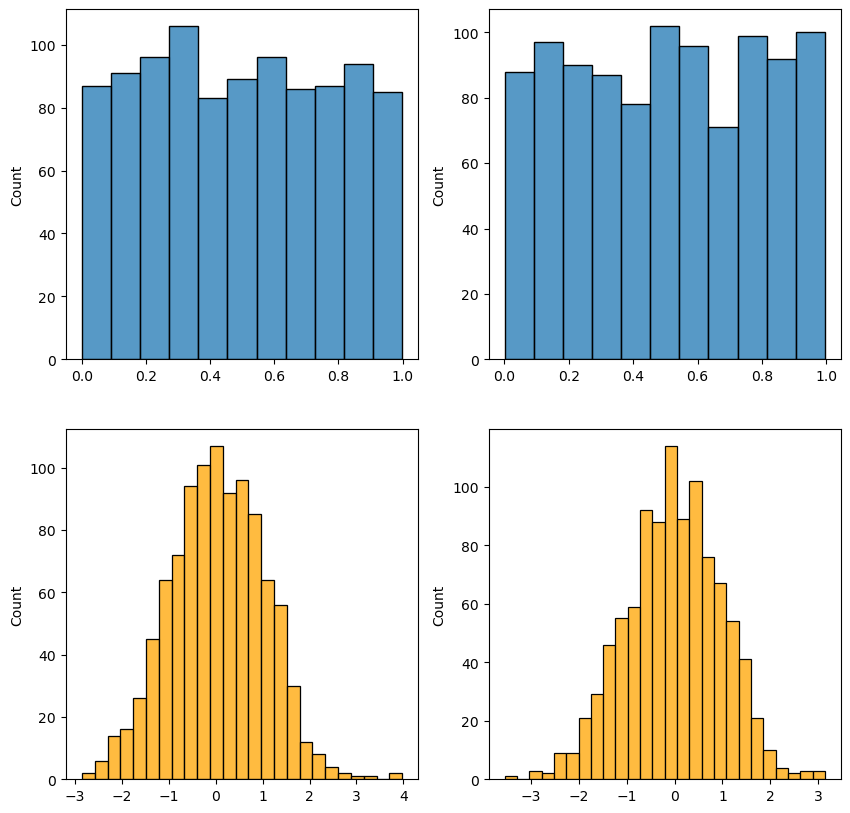

In [281]:
u1 = np.random.uniform(0.0, 1.0, size=1000)
u2 = np.random.uniform(0.0, 1.0, size=1000)

z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2*np.pi*u2)
z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2*np.pi*u2)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(u1, ax=axes[0][0])
sns.histplot(u2, ax=axes[0][1])
sns.histplot(z0, ax=axes[1][0], color='orange')
sns.histplot(z1, ax=axes[1][1], color='orange')
# plt.hist(z1)

## Example: Breast cancer data set

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

dataset = load_breast_cancer()

X = dataset['data']
Y = dataset['target']

X = Normalizer().fit_transform(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, stratify=Y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

Normal distribution uses 
$$
    P(X) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp{-\frac12 (X-\mu)^T \Sigma^{-1} (X-\mu)}
$$
However, in using numpy, we need to be able to process an entire data set. Therefore, the transpose is switched in the Mahalanobis distance and the diagonal is taken from the result of the distance measure. 
$$
    P(X) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp{-\frac12 diag((X-\mu) \Sigma^{-1} (X-\mu)^T)}
$$  

In [10]:
# Standard normal distribution
normal = lambda x, mu, cov: (1/((2*np.pi)**(cov.shape[0]/2) * np.linalg.det(cov)**0.5)) * np.exp(-0.5 * (x-mu).T @ np.linalg.pinv(cov) @ (x-mu))

# mean vector of C = 1
means = X_train[y_train == 1].mean(axis=0)
cov = np.cov(X_train[y_train == 1], rowvar=False)

p_c = y_train.sum()/len(y_train)

# Naive approach by using list comprehension
y_hat = np.array([np.log(normal(x, means, cov)) + np.log(p_c) for x in X_train])

# Efficient way
normal_matrix = lambda x, mu, cov: (1/((2*np.pi)**(cov.shape[0]/2) * np.linalg.det(cov)**0.5)) * np.exp(-0.5 * np.diag((x-mu) @ np.linalg.pinv(cov) @ (x-mu).T))

y_hat_testing = np.log(normal_matrix(X_train, means, cov)) + np.log(p_c)

# test for equality
print(y_hat_testing[:5])
print(y_hat[:5])

np.all(np.isclose(y_hat_testing, y_hat))

[224.02057226 214.14977143 186.83419554 225.87467663 156.57545333]
[224.02057226 214.14977143 186.83419554 225.87467663 156.57545333]


C:\Users\janba\AppData\Local\Temp\ipykernel_21600\1447012282.py:11: RuntimeWarning: divide by zero encountered in log
  y_hat = np.array([np.log(normal(x, means, cov)) + np.log(p_c) for x in X_train])
C:\Users\janba\AppData\Local\Temp\ipykernel_21600\1447012282.py:16: RuntimeWarning: divide by zero encountered in log
  y_hat_testing = np.log(normal_matrix(X_train, means, cov)) + np.log(p_c)


True

Taking the log of the Normal distribution has the advantage that the probabilities are computable. 
$$
    \log P(X|C) = -\frac12 \log |\Sigma| - \frac12 diag((X-\mu) \Sigma^{-1} (X-\mu)^T) + \log(P(C))
$$

<AxesSubplot: xlabel='y', ylabel='Density'>

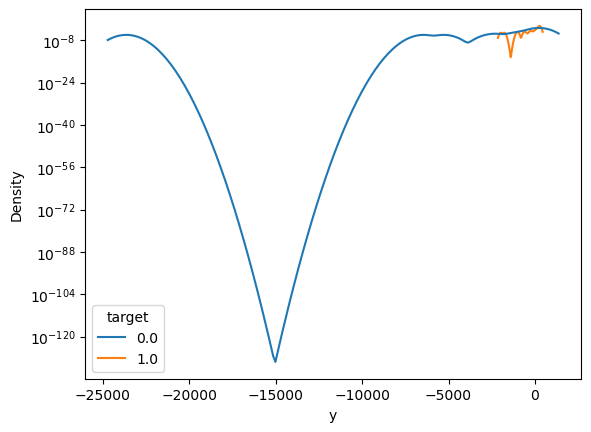

In [53]:
# Rewritten normal with logs (better for computations)
log_normal = lambda x, mu, cov, p_c: -0.5 * np.log(np.linalg.det(cov)) - 0.5 * np.diag((x-mu) @ np.linalg.pinv(cov) @ (x-mu).T) + np.log(p_c)

# mean vector, covariance matrix and p(C = 1) for target 1
means1 = X_train[y_train == 1].mean(axis=0)
cov1 = np.cov(X_train[y_train == 1], rowvar=False)
p_c1 = y_train.sum()/len(y_train)

# mean vector, covariance matrix and p(C = 0) for target 0
means0 = X_train[y_train == 0].mean(axis=0)
cov0 = np.cov(X_train[y_train == 0], rowvar=False)
p_c0 = 1 - y_train.sum()/len(y_train)

# Using training set for validation 
y_hat1 = log_normal(X_train, means1, cov1, p_c1)
y_hat0 = log_normal(X_train, means0, cov0, p_c0)

total_y_hat = pd.DataFrame({'y': np.concatenate((y_hat1, y_hat0)), 'target': np.concatenate((np.ones_like(y_hat1), np.zeros_like(y_hat0)))})

ax = plt.subplot()
ax.set_yscale('log')
sns.kdeplot(data=total_y_hat, x='y', hue='target', ax=ax)

In [58]:
y_hat = (y_hat1 > y_hat0)*1
err = np.mean((y_hat - y_train)**2)
acc = np.sum(y_hat == y_train)/len(y_train)

err, acc

(0.06593406593406594, 0.9340659340659341)

In [57]:
y_hat1_test = log_normal(X_test, means1, cov1, p_c1)
y_hat0_test = log_normal(X_test, means0, cov0, p_c0)

y_hat_test = (y_hat1_test > y_hat0_test)*1
err = np.mean((y_hat_test - y_test)**2)
acc = np.sum(y_hat_test == y_test)/len(y_test)

err, acc

(0.09649122807017543, 0.9035087719298246)

### Using PCA for dimensionality reduction

Results are the same but with less complexity

<AxesSubplot: xlabel='y', ylabel='Density'>

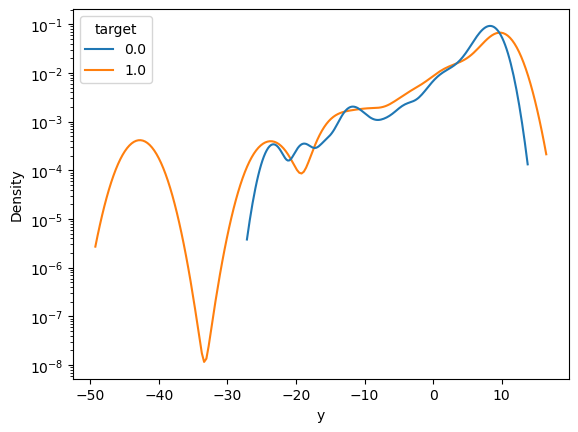

In [63]:
from sklearn.decomposition import PCA

dataset = load_breast_cancer()

X = dataset['data']
Y = dataset['target']

X = Normalizer().fit_transform(X, Y)

X = PCA(n_components=.95).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, stratify=Y)

# Rewritten normal with logs (better for computations)
log_normal = lambda x, mu, cov, p_c: -0.5 * np.log(np.linalg.det(cov)) - 0.5 * np.diag((x-mu) @ np.linalg.pinv(cov) @ (x-mu).T) + np.log(p_c)

# mean vector, covariance matrix and p(C = 1) for target 1
means1 = X_train[y_train == 1].mean(axis=0)
cov1 = np.cov(X_train[y_train == 1], rowvar=False)
p_c1 = y_train.sum()/len(y_train)

# mean vector, covariance matrix and p(C = 0) for target 0
means0 = X_train[y_train == 0].mean(axis=0)
cov0 = np.cov(X_train[y_train == 0], rowvar=False)
p_c0 = 1 - y_train.sum()/len(y_train)

# Using training set for validation 
y_hat1 = log_normal(X_train, means1, cov1, p_c1)
y_hat0 = log_normal(X_train, means0, cov0, p_c0)

total_y_hat = pd.DataFrame({'y': np.concatenate((y_hat1, y_hat0)), 'target': np.concatenate((np.ones_like(y_hat1), np.zeros_like(y_hat0)))})

ax = plt.subplot()
ax.set_yscale('log')
sns.kdeplot(data=total_y_hat, x='y', hue='target', ax=ax)

In [64]:
y_hat = (y_hat1 > y_hat0)*1
err = np.mean((y_hat - y_train)**2)
acc = np.sum(y_hat == y_train)/len(y_train)

err, acc

(0.08131868131868132, 0.9186813186813186)

In [65]:
y_hat1_test = log_normal(X_test, means1, cov1, p_c1)
y_hat0_test = log_normal(X_test, means0, cov0, p_c0)

y_hat_test = (y_hat1_test > y_hat0_test)*1
err = np.mean((y_hat_test - y_test)**2)
acc = np.sum(y_hat_test == y_test)/len(y_test)

err, acc

(0.05263157894736842, 0.9473684210526315)

## Example: classification with synthetic data 

<AxesSubplot: >

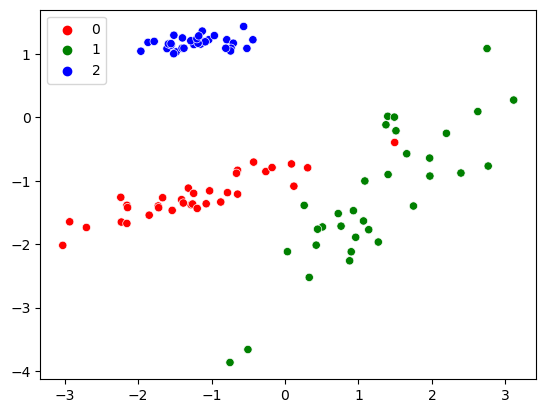

In [171]:
from sklearn.datasets import make_classification

X, Y = make_classification(
    n_samples=100, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_repeated=0, 
    n_classes=3,
    n_clusters_per_class=1,
    class_sep=1.2
)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, palette=['r', 'g', 'b'])

#### Different covariance matrix per class

[(array([-0.41021928]), 0), (array([-4.63475149]), 1), (array([-297.17072266]), 2)]
max_val=array([-0.41021928])
y_hat=0


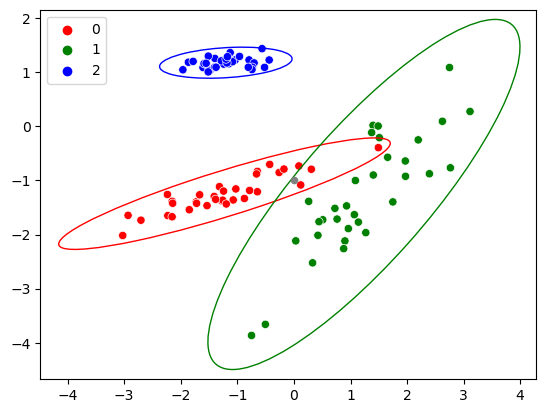

In [172]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# Rewritten normal with logs (better for computations)
log_normal = lambda x, mu, cov, p_c: -0.5 * np.log(np.linalg.det(cov)) - 0.5 * np.diag((x-mu) @ np.linalg.pinv(cov) @ (x-mu).T) + np.log(p_c)

def compute_params(X, Y, c):
    means = X[Y == c].mean(axis=0)
    cov = np.cov(X[Y == c], rowvar=False)
    p_c = (Y==c).sum()/len(Y)
    return (means, cov, p_c)

params = [compute_params(X, Y, c) for c in np.unique(Y)]

fig, ax = plt.subplots(1, 1)

palette = ['r', 'g', 'b']
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, palette=palette, ax=ax)

for (col, (means, cov, p_c)) in zip(palette, params):

    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    radius_x = np.sqrt(1+pearson)
    radius_y = np.sqrt(1-pearson)

    scale = np.sqrt(np.diag(cov)) * 3

    ellipse = Ellipse([0, 0], width=radius_x*2, height=radius_y*2, facecolor='none', edgecolor=col)

    transf = transforms.Affine2D() \
            .rotate_deg(45) \
            .scale(scale[0], scale[1]) \
            .translate(means[0], means[1])

    ellipse.set_transform(transf + ax.transData)

    ax.add_patch(ellipse)


test_point = np.array([[0.0], [-1.0]])
ax.scatter(test_point[0, 0], test_point[1, 0], s=20, c='grey')

# inference for test point
discriminant_output = [(log_normal(test_point.T, means, cov, p_c), i) for i, (means, cov, p_c) in enumerate(params)]

# take maximum
max_val, y_hat = max(discriminant_output, key=lambda val: val[0])

print(discriminant_output)
print(f"{max_val=}")
print(f"{y_hat=}")

#### Shared covariance matrix via pooling for every class

[(array([-2.77503203]), 0), (array([-4.64222824]), 1), (array([-22.49445374]), 2)]
max_val=array([-2.77503203])
y_hat=0


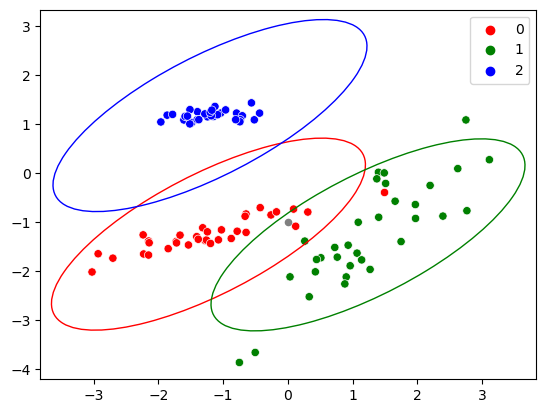

In [173]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# Rewritten normal with logs (better for computations)
log_normal_pooled = lambda x, mu, cov, p_c: - 0.5 * np.diag((x-mu) @ np.linalg.pinv(cov) @ (x-mu).T) + np.log(p_c)

def compute_params(X, Y, c):
    means = X[Y == c].mean(axis=0)
    cov = np.cov(X[Y == c], rowvar=False)
    p_c = (Y==c).sum()/len(Y)
    return (means, cov, p_c)

params = [compute_params(X, Y, c) for c in np.unique(Y)]
pooled_cov = np.sum([ cov * p_c for (_, cov, p_c) in params], axis=0)

fig, ax = plt.subplots(1, 1)

palette = ['r', 'g', 'b']
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, palette=palette, ax=ax)

for (col, (means, _, p_c)) in zip(palette, params):

    pearson = pooled_cov[0, 1]/np.sqrt(pooled_cov[0, 0] * pooled_cov[1, 1])
    radius_x = np.sqrt(1+pearson)
    radius_y = np.sqrt(1-pearson)

    scale = np.sqrt(np.diag(pooled_cov)) * 3

    ellipse = Ellipse([0, 0], width=radius_x*2, height=radius_y*2, facecolor='none', edgecolor=col)

    transf = transforms.Affine2D() \
            .rotate_deg(45) \
            .scale(scale[0], scale[1]) \
            .translate(means[0], means[1])

    ellipse.set_transform(transf + ax.transData)

    ax.add_patch(ellipse)


test_point = np.array([[0.0], [-1.0]])
ax.scatter(test_point[0, 0], test_point[1, 0], s=20, c='grey')

# inference for test point
discriminant_output = [(log_normal_pooled(test_point.T, means, pooled_cov, p_c), i) for i, (means, _, p_c) in enumerate(params)]

# take maximum
max_val, y_hat = max(discriminant_output, key=lambda val: val[0])

print(discriminant_output)
print(f"{max_val=}")
print(f"{y_hat=}")

### Equal priors
Priors are approximately the same

In [159]:
np.sum(Y == 0), np.sum(Y == 1), np.sum(Y == 2)

(34, 33, 33)

### Naive Bayes' Classifier

#### without covariance pooling
Per class, different covariance matrix with zero off-diagonal covariances

[(array([-2.12295246]), 0), (array([-2.04366724]), 1), (array([-264.58527828]), 2)]
max_val=array([-2.04366724])
y_hat=1


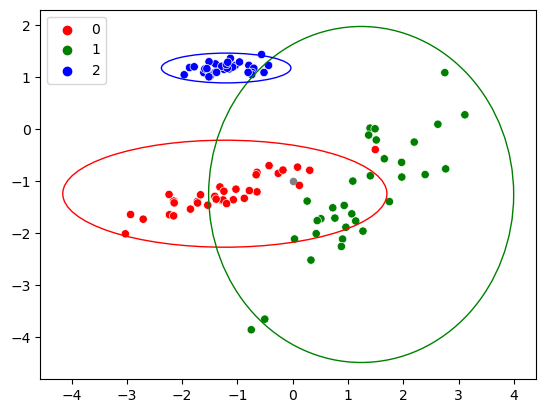

In [174]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# Rewritten normal with logs (better for computations)
log_normal_pooled = lambda x, mu, cov, p_c: - 0.5 * np.diag((x-mu) @ np.linalg.pinv(cov) @ (x-mu).T) + np.log(p_c)

def compute_params(X, Y, c):
    means = X[Y == c].mean(axis=0)
    cov = np.cov(X[Y == c], rowvar=False)
    # off-diagonal is set to 0
    cov = cov * np.identity(len(cov))
    p_c = (Y==c).sum()/len(Y)
    return (means, cov, p_c)

params = [compute_params(X, Y, c) for c in np.unique(Y)]

fig, ax = plt.subplots(1, 1)

palette = ['r', 'g', 'b']
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, palette=palette, ax=ax)

for (col, (means, cov, p_c)) in zip(palette, params):

    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    radius_x = np.sqrt(1+pearson)
    radius_y = np.sqrt(1-pearson)

    scale = np.sqrt(np.diag(cov)) * 3

    ellipse = Ellipse([0, 0], width=radius_x*2, height=radius_y*2, facecolor='none', edgecolor=col)

    transf = transforms.Affine2D() \
            .rotate_deg(45) \
            .scale(scale[0], scale[1]) \
            .translate(means[0], means[1])

    ellipse.set_transform(transf + ax.transData)

    ax.add_patch(ellipse)


test_point = np.array([[0.0], [-1.0]])
ax.scatter(test_point[0, 0], test_point[1, 0], s=20, c='grey')

# inference for test point
discriminant_output = [(log_normal_pooled(test_point.T, means, cov, p_c), i) for i, (means, cov, p_c) in enumerate(params)]

# take maximum
max_val, y_hat = max(discriminant_output, key=lambda val: val[0])

print(discriminant_output)
print(f"{max_val=}")
print(f"{y_hat=}")

#### with covariance pooling
Pooled covariance matrix with zero off-diagonal covariances

[(array([-2.30169256]), 0), (array([-2.35921776]), 1), (array([-7.75975809]), 2)]
max_val=array([-2.30169256])
y_hat=0


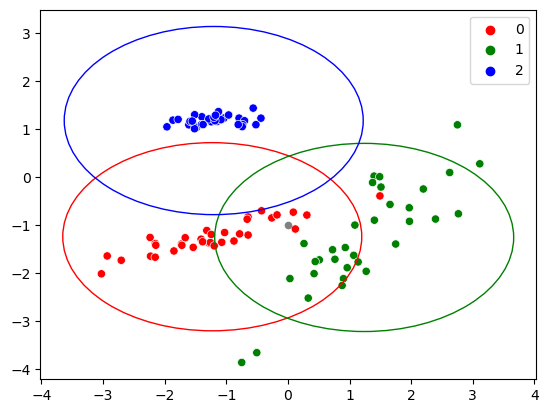

In [175]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# Rewritten normal with logs (better for computations)
log_normal_pooled = lambda x, mu, cov, p_c: - 0.5 * np.diag((x-mu) @ np.linalg.pinv(cov) @ (x-mu).T) + np.log(p_c)

def compute_params(X, Y, c):
    means = X[Y == c].mean(axis=0)
    cov = np.cov(X[Y == c], rowvar=False)
    p_c = (Y==c).sum()/len(Y)
    return (means, cov, p_c)

params = [compute_params(X, Y, c) for c in np.unique(Y)]
pooled_cov = np.sum([ cov * p_c for (_, cov, p_c) in params], axis=0)

# off-diagonal is set to 0
pooled_cov = pooled_cov * np.identity(len(pooled_cov))

fig, ax = plt.subplots(1, 1)

palette = ['r', 'g', 'b']
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, palette=palette, ax=ax)

for (col, (means, _, p_c)) in zip(palette, params):

    pearson = pooled_cov[0, 1]/np.sqrt(pooled_cov[0, 0] * pooled_cov[1, 1])
    radius_x = np.sqrt(1+pearson)
    radius_y = np.sqrt(1-pearson)

    scale = np.sqrt(np.diag(pooled_cov)) * 3

    ellipse = Ellipse([0, 0], width=radius_x*2, height=radius_y*2, facecolor='none', edgecolor=col)

    transf = transforms.Affine2D() \
            .rotate_deg(45) \
            .scale(scale[0], scale[1]) \
            .translate(means[0], means[1])

    ellipse.set_transform(transf + ax.transData)

    ax.add_patch(ellipse)


test_point = np.array([[0.0], [-1.0]])
ax.scatter(test_point[0, 0], test_point[1, 0], s=20, c='grey')

# inference for test point
discriminant_output = [(log_normal_pooled(test_point.T, means, pooled_cov, p_c), i) for i, (means, _, p_c) in enumerate(params)]

# take maximum
max_val, y_hat = max(discriminant_output, key=lambda val: val[0])

print(discriminant_output)
print(f"{max_val=}")
print(f"{y_hat=}")

### Nearest Mean Classifier 

[(array([-2.30169256]), 0), (array([-2.35921776]), 1), (array([-7.75975809]), 2)]
max_val=array([-2.30169256])
y_hat=0


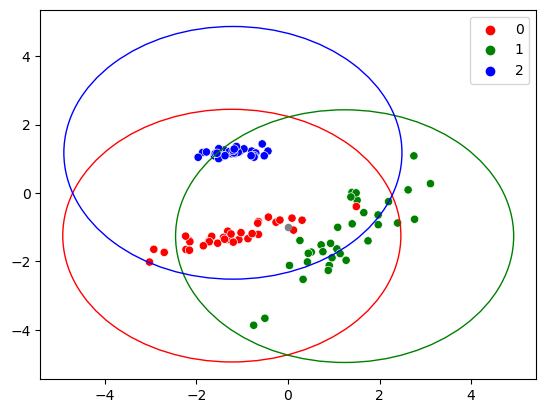

In [189]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def compute_params(X, Y, c):
    means = X[Y == c].mean(axis=0)
    cov = np.var(X[Y == c])
    p_c = (Y==c).sum()/len(Y)
    return (means, cov, p_c)

params = [compute_params(X, Y, c) for c in np.unique(Y)]

var = np.mean([cov for (_, cov, _) in params])

fig, ax = plt.subplots(1, 1)

palette = ['r', 'g', 'b']
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, palette=palette, ax=ax)

for (col, (means, _, p_c)) in zip(palette, params):

    pearson = 0
    radius_x = np.sqrt(1+pearson)
    radius_y = np.sqrt(1-pearson)

    scale = np.sqrt(var) * 3

    ellipse = Ellipse([0, 0], width=radius_x*2, height=radius_y*2, facecolor='none', edgecolor=col)

    transf = transforms.Affine2D() \
            .rotate_deg(45) \
            .scale(scale, scale) \
            .translate(means[0], means[1])

    ellipse.set_transform(transf + ax.transData)

    ax.add_patch(ellipse)


test_point = np.array([[0.0], [-1.0]])
ax.scatter(test_point[0, 0], test_point[1, 0], s=20, c='grey')

nearest_mean = lambda x, mu, var, p_c: - ((x-mu) @ (x-mu).T)**2 / (2 * var) + np.log(p_c)

# inference for test point
discriminant_output = [(log_normal_pooled(test_point.T, means, pooled_cov, p_c), i) for i, (means, _, p_c) in enumerate(params)]

# take maximum
max_val, y_hat = max(discriminant_output, key=lambda val: val[0])

print(discriminant_output)
print(f"{max_val=}")
print(f"{y_hat=}")

### All in one plot

Text(0.5, 1.0, 'Nearest mean classifier')

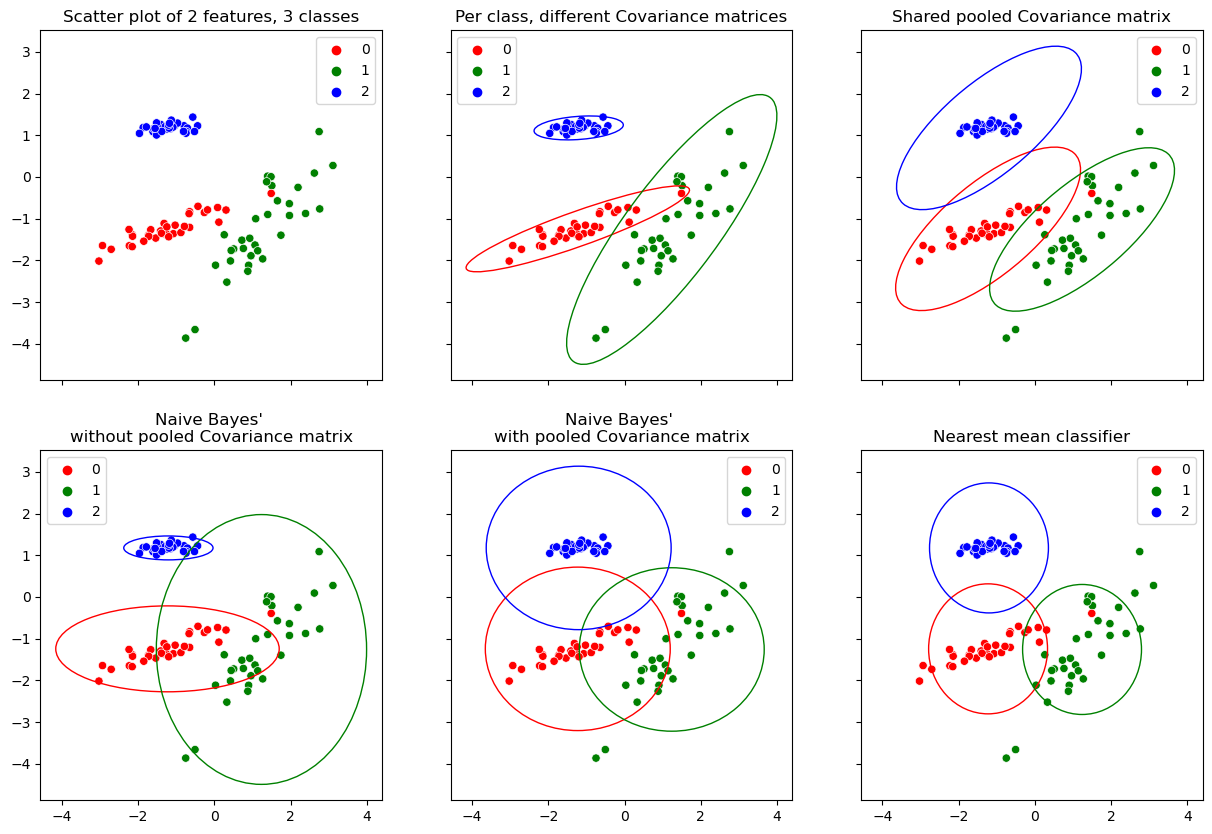

In [193]:
def compute_params(X, Y, c):
    means = X[Y == c].mean(axis=0)
    cov = np.cov(X[Y == c], rowvar=False)
    p_c = (Y==c).sum()/len(Y)
    return (means, cov, p_c)

def add_ellipse(means, cov, color, ax):
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    
    radius_x = np.sqrt(1+pearson)
    radius_y = np.sqrt(1-pearson)
    scale = np.sqrt(np.diag(cov)) * 3

    ellipse = Ellipse([0, 0], width=radius_x*2, height=radius_y*2, facecolor='none', edgecolor=color)
    transf = transforms.Affine2D() \
            .rotate_deg(45) \
            .scale(scale[0], scale[1]) \
            .translate(means[0], means[1])
    
    ellipse.set_transform(transf + ax.transData)
    ax.add_patch(ellipse)

log_normal = lambda x, mu, cov, p_c: -0.5 * np.log(np.linalg.det(cov)) - 0.5 * np.diag((x-mu) @ np.linalg.pinv(cov) @ (x-mu).T) + np.log(p_c)

fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten()

palette = ['r', 'g', 'b']

# scatter plot for all axes
for i in range(len(axes)):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, palette=palette, ax=axes[i])
axes[0].set_title("Scatter plot of 2 features, 3 classes")

# different cov matrices
params = [compute_params(X, Y, c) for c in np.unique(Y)]
for (col, (means, cov, _)) in zip(palette, params):
    add_ellipse(means, cov, col, axes[1])
axes[1].set_title("Per class, different Covariance matrices")

# shared cov matrices
params = [compute_params(X, Y, c) for c in np.unique(Y)]
pooled_cov = np.sum([ cov * p_c for (_, cov, p_c) in params], axis=0)
for (col, (means, _, _)) in zip(palette, params):
    add_ellipse(means, pooled_cov, col, axes[2])
axes[2].set_title("Shared pooled Covariance matrix")

# naive bayes without pooled shared cov matrices
params = [compute_params(X, Y, c) for c in np.unique(Y)]
params = [(means, cov * np.identity(len(cov)), p_c) for (means, cov, p_c) in params]
for (col, (means, cov, _)) in zip(palette, params):
    add_ellipse(means, cov, col, axes[3])
axes[3].set_title("Naive Bayes' \nwithout pooled Covariance matrix")

# naive bayes without pooled shared cov matrices
params = [compute_params(X, Y, c) for c in np.unique(Y)]
params = [(means, cov * np.identity(len(cov)), p_c) for (means, cov, p_c) in params]
pooled_cov = np.sum([ cov * p_c for (_, cov, p_c) in params], axis=0)
for (col, (means, _, _)) in zip(palette, params):
    add_ellipse(means, pooled_cov, col, axes[4])
axes[4].set_title("Naive Bayes' \nwith pooled Covariance matrix")

# nearest mean classifier
params = [compute_params(X, Y, c) for c in np.unique(Y)]
params = [(means, cov * np.identity(len(cov)), p_c) for (means, cov, p_c) in params]
# var = np.mean([cov for (_, cov, _) in params], axis=0)
var = np.mean([cov for (_, cov, _) in params])
for (col, (means, _, _)) in zip(palette, params):
    # add_ellipse(means, var, col, axes[5])
    radius_x = 1
    radius_y = 1

    scale = np.sqrt(var) * 3

    ellipse = Ellipse([0, 0], width=radius_x*2, height=radius_y*2, facecolor='none', edgecolor=col)

    transf = transforms.Affine2D() \
            .rotate_deg(45) \
            .scale(scale, scale) \
            .translate(means[0], means[1])

    ellipse.set_transform(transf + axes[5].transData)

    axes[5].add_patch(ellipse)
axes[5].set_title("Nearest mean classifier")


## Multivariate regression

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

dataset = load_breast_cancer()

X = dataset['data']
Y = dataset['target']

X = Normalizer().fit_transform(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, stratify=Y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

$$
    \bm{w} = (\bm{X}^T\bm{X})^{-1} \bm{X}^T \bm{y}
$$

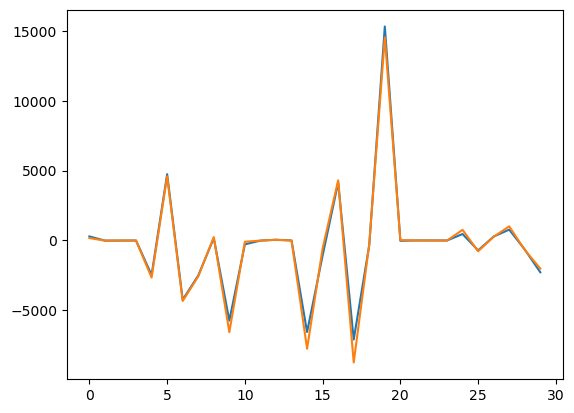

In [21]:
from sklearn.linear_model import LinearRegression

# sklearn
model = LinearRegression().fit(X_train, y_train)

# hand crafted
w = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train

plt.plot(w)
plt.plot(model.coef_)

In [22]:
np.mean((model.predict(X_test)-y_test)**2)

0.06122311198150776

In [28]:
feature_importance = list(zip(dataset.feature_names, w))
feature_importance

[('mean radius', 290.21785586111054),
 ('mean texture', -10.060417905543446),
 ('mean perimeter', -10.321089513503953),
 ('mean area', -1.3744787641592373),
 ('mean smoothness', -2473.1763929528724),
 ('mean compactness', 4744.121333095908),
 ('mean concavity', -4242.718533837306),
 ('mean concave points', -2512.3427769257005),
 ('mean symmetry', 168.81404952115008),
 ('mean fractal dimension', -5738.066735036956),
 ('radius error', -276.73308800368295),
 ('texture error', -10.436237107486136),
 ('perimeter error', 50.907790623701544),
 ('area error', -0.8720446388721279),
 ('smoothness error', -6554.284832471855),
 ('compactness error', -1081.3990213845382),
 ('concavity error', 4149.957102564215),
 ('concave points error', -7089.896413424408),
 ('symmetry error', -330.21849026772),
 ('fractal dimension error', 15316.539752586323),
 ('worst radius', -23.21170102272059),
 ('worst texture', 0.7755741098474367),
 ('worst perimeter', 1.5101157429104006),
 ('worst area', -0.590803857221792

In [33]:
# features ranked from best to worst by taking the absolute value
feature_importance.sort(key=lambda x: abs(x[1]), reverse=True)
feature_importance

[('fractal dimension error', 15316.539752586323),
 ('concave points error', -7089.896413424408),
 ('smoothness error', -6554.284832471855),
 ('mean fractal dimension', -5738.066735036956),
 ('mean compactness', 4744.121333095908),
 ('mean concavity', -4242.718533837306),
 ('concavity error', 4149.957102564215),
 ('mean concave points', -2512.3427769257005),
 ('mean smoothness', -2473.1763929528724),
 ('worst fractal dimension', -2277.5150134756414),
 ('compactness error', -1081.3990213845382),
 ('worst concave points', 775.2678163503904),
 ('worst compactness', -713.0800209474579),
 ('worst symmetry', -645.8635489360839),
 ('worst smoothness', 462.8141182632962),
 ('symmetry error', -330.21849026772),
 ('mean radius', 290.21785586111054),
 ('worst concavity', 281.0996087376966),
 ('radius error', -276.73308800368295),
 ('mean symmetry', 168.81404952115008),
 ('perimeter error', 50.907790623701544),
 ('worst radius', -23.21170102272059),
 ('texture error', -10.436237107486136),
 ('mean 